# House Price Prediction 

## Introduction

Developing an ML model that will be used to predict the price of houses based on some given features of the house


## Roadmap

- Importing libraries
- importing data from the sklearn.datasets
- Visualizing the data
- Data cleaning
- Feature engineering or preprocessing
- Feature scaling using z-score normalization
- Visualizing the data as a graph
- Computing cost 
- Computing gradient
- computing gradient descent and regularization
- Plotting and analyzing the cost function
- Finding the weight for each feature and the bias
- Plotting and analyzing the predictions made by the parameters
- Finding the accuracy of the pamaters
- Making predictions using the parameters

## Importing libraries

- Numpy
- matplotlib.pyplot
- Helper functions from the course resources

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math, copy
#from lab_utils_common import dlc
from sklearn.datasets import fetch_california_housing

## Loading the data 

- Loads the training data from sklearn.datasets

In [2]:
#Loads the entire housing data from sklearn datasets
california = fetch_california_housing()
#Copies the data in the features into x_train
X_train = california.data
y_train = california.target
X_features = california.feature_names
#Outputs the shape of the features of the training data
print(f'The shape of the features training data is {X_train.shape}')
#Ouputs the shape of the target of the training data
print(f'The shape of the targets training data is {y_train.shape}')
#Outpust the shape of the feature_names
print(f'The shape of the feature names of the training data is {len(X_features)}')
#print(X_train)
#print(y_train)
print(f'The features for the California House Prediction model are: \n {X_features}')

The shape of the features training data is (20640, 8)
The shape of the targets training data is (20640,)
The shape of the feature names of the training data is 8
The features for the California House Prediction model are: 
 ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


## Displaying the first training example and the target value in the training data 

Shows the first training example and the target value

In [3]:
# First traing example
print(f'The first training example is shown below: \n {X_train[0]}')
print(f'The shape of the first training example is {X_train[0].shape}')

#Target value for the first training example
print(f'\nThe target value for the first training example is {y_train[0]}')

The first training example is shown below: 
 [   8.3252       41.            6.98412698    1.02380952  322.
    2.55555556   37.88       -122.23      ]
The shape of the first training example is (8,)

The target value for the first training example is 4.526


## Visualizing the data 

- Plot each of the features and visualize how it varries with the price of the house 
- TODO: Write the function on my own and import it here rather

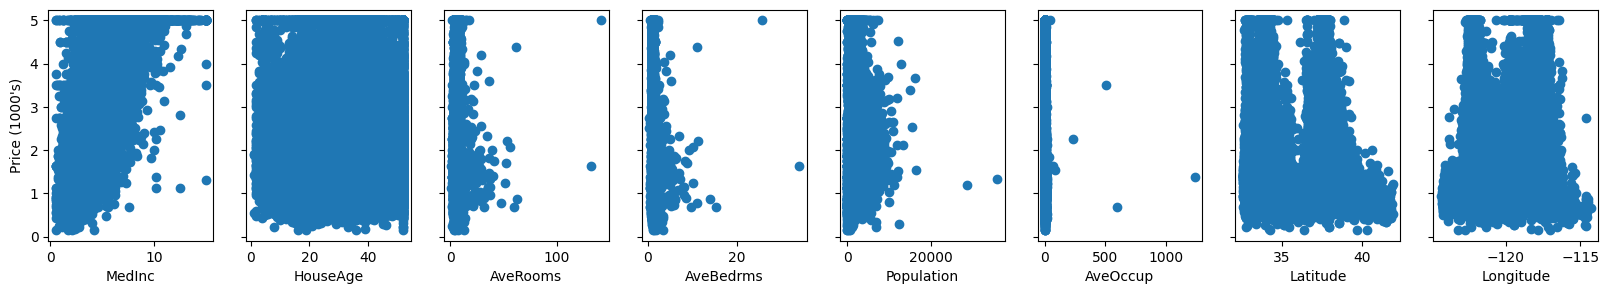

In [4]:
fig,ax = plt.subplots(1, 8, figsize=(20, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

### Brief description of the data 

- The AveOccup feature has little influence on the price of houses 

## Feature scaling or Normalization using z-score normalization

- This scales all the features so none of them has a greater influence on the price of the house than others
- Feature scaling or normalization helps gradient descent to converge early since all the features will be approaching the thier weights that gives the least cost function

- X_scaled = (x_i - mean) / standard_deviation

## Numpy mean and standard deviation intuition

- Provides an intuition of numpy's mean and standard deviation
- These will used to calculate the z-score normslization

In [5]:
#Lets have a bit of intuition of how np.mean and np.std work
#Selects two columns/features of the X_train data
X_train_2_features = X_train[:,[0,2]]
#print(X_train_2_features)
print(f'The shape of the slected features is {X_train_2_features.shape}')
#Calculates the mean of each feature of the training example
mu = np.mean(X_train_2_features, axis=0)
print(f'Mean {mu}')
print(f'The shape of the mu of the two features is {mu.shape}')

#Calculates the standard of each columnm/feature of the training example 
sigma = np.std(X_train_2_features, axis=0)
print(f'The standard deviation is {sigma}')
print(f'The shape of the sigma of the two features is {sigma.shape}' )

The shape of the slected features is (20640, 2)
Mean [3.870671   5.42899974]
The shape of the mu of the two features is (2,)
The standard deviation is [1.89977569 2.4741132 ]
The shape of the sigma of the two features is (2,)


## Calculating the z-score normalization

- Defines a function that calculates the z-score normalization 


In [6]:
#Function that uses z-score normalization to scale the features
def zscore_normalize_features(X):
    #Find the mean of each column/feature
    mu = np.mean(X, axis=0)     #mu returns an array of size (n,)
    
    #Finds the stanadard deviation of each column/feature
    sigma = np.std(X, axis=0)    #sigma an array of size (n,)
    
    #Element-wise, subtract the mu for each column from each example and divide by the standard dev for that col
    X_norm = (X - mu) / sigma
    
    return (X_norm, mu, sigma)

## Visualizing the steps in z-score normalization

This gives an intuition of the processes in z-score normalization and how each step scales the features/columns \
 Demonstrates how two features vary in the 
- unnormalized form
- X - mean form
- normalized form 

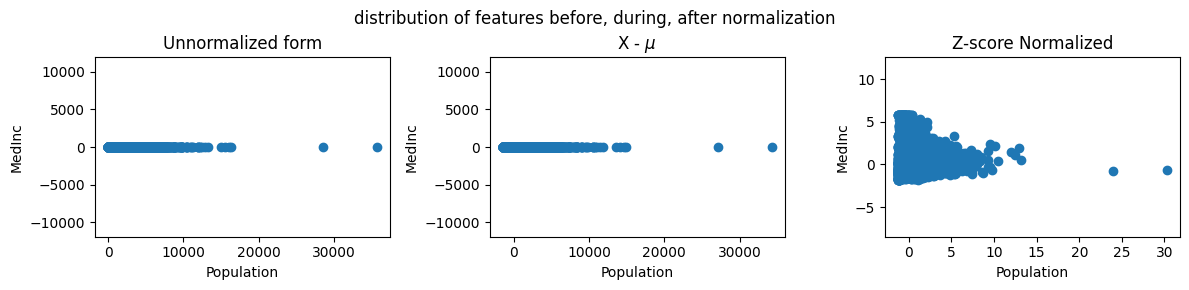

In [7]:
#Calculates the mean of each feature
mu = np.mean(X_train, axis=0)

#Calculates the standard deviation of each feature
sigma = np.std(X_train, axis=0)

#Subtracts the mean of each cell from the mean of the column
X_mean = (X_train - mu)

#Calculates the z-score normalization
X_norm = (X_train - mu) / sigma

#Plots two features to visualize how they vary 
fig, ax = plt.subplots(1, 3, figsize=(12,3))

#Plots the graph of the unnormalized version of two features of the training data
ax[0].scatter(X_train[:,4], X_train[:,0])
ax[0].set_xlabel(X_features[4]); ax[0].set_ylabel(X_features[0])
ax[0].set_title('Unnormalized form')
ax[0].axis('equal')

#Plots the graph of the X - mu version of the two features of the training data
ax[1].scatter(X_mean[:,4], X_mean[:,0])
ax[1].set_xlabel(X_features[4]); ax[1].set_ylabel(X_features[0])
ax[1].set_title(r'X - $\mu$')
ax[1].axis('equal')

#Plots the graph of the z-score normalized version of the two features of the training data 
ax[2].scatter(X_norm[:,4], X_norm[:,0])
ax[2].set_xlabel(X_features[4]); ax[2].set_ylabel(X_features[0])
ax[2].set_title('Z-score Normalized')
ax[2].axis('equal')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

## Normalizing the features/columns

Calls the function that computes the z-score normalization of the features to scale the features

In [8]:
#Calls the function that computes the z-score normalization of the features
X_norm, mu, sigma = zscore_normalize_features(X_train)
#print(f'The normalized data is \n {X_norm}')
print(f'The shape of the normalized training data is {X_norm.shape}')

The shape of the normalized training data is (20640, 8)


## Checks the min and max number for each feature

This checks the minimum and maximum number for each feature after standardization

In [9]:
# Outputs the minimum value of each feature in the traing example
print('The minimum value for each feature in the training data is :')
X_norm.min(axis=0)

The minimum value for each feature in the training data is :


array([-1.77429947, -2.19618048, -1.8523186 , -1.61076772, -1.25612255,
       -0.22899997, -1.447568  , -2.38599234])

In [10]:
# Outputs the maximum value of each feature in the training example
print('The maximum value for each feature in the training data is: ')
X_norm.max(axis=0)

The maximum value for each feature in the training data is: 


array([  5.85828581,   1.85618152,  55.16323628,  69.57171326,
        30.25033022, 119.41910319,   2.95806762,   2.62528006])

## Computing cost

This implements a function that calculates the cost of the model based on the weight and bias
The cost function is regularized to prevent overfitting by panalizing each weight

In [11]:
#Function that calculates the cost of our models prediction based on the weight(w) and bias(b)
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        f_wb = (f_wb_i - y[i])**2
        cost = cost + f_wb
        
    total_cost = cost / (2 * m)
    return total_cost  

## Testing the cost function implementation

This calls the cost function with arbitrary weights for each feature and a bias

In [12]:
#Calls the compute cost function and outpust the results
w_norm = np.zeros(X_train.shape[1])
b_norm = 0.2
#print(w)
cost = compute_cost(X_train,y_train, w_norm, b_norm)
print(cost)

2.4115299656757414


## Plots the predicted values against the target values

This plots our predicted values using weight of zeros and a bias of 0.2

A representation of how the cost function results in a great value

Text(0.5, 0.98, 'Target versus Prediction using random weight and bias')

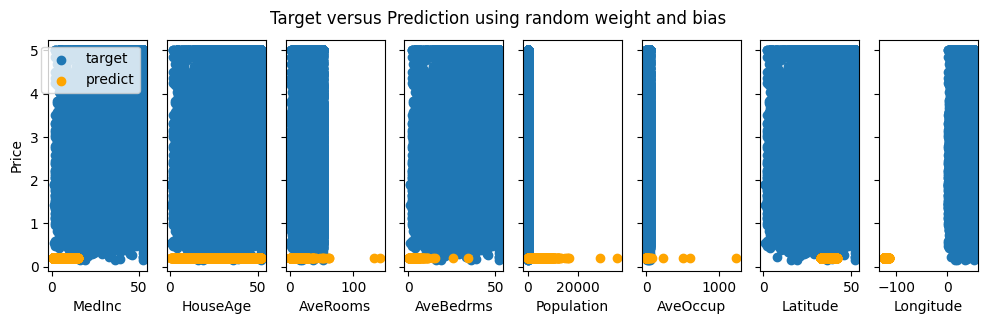

In [13]:
#Calulates the our models prediction using the assumed weights and bias 
m,n = X_train.shape
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_train[i],w_norm) + b_norm
    
#Plot predictions versus original values against features
'''
    TODO: Edit the code to output a graph showing the targets versus the predicted values instead
'''
fig, ax = plt.subplots(1,8, figsize = (12,3), sharey = True)

for i in range(len(ax)):
    ax[i].scatter(X_train[:,1], y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],yp,color='orange', label = 'predict')
ax[0].set_ylabel('Price'); ax[0].legend()
fig.suptitle('Target versus Prediction using random weight and bias')

The graphical representation of the predicted and target values above shows why the cost function yields a very big number is the error in the predicted values and the target values are very wide

## Compute gradient 

This computes the gradient of the weight that leads it to the local minima

In [14]:
#Function that computes the gradient of each feature
def compute_gradient(X, y, w, b):
    m,n = X.shape
    
    dj_dw = np.zeros((n,))
    dj_db = 0
    
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        f_wb = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + (f_wb * X[i,j])
            
        dj_db = dj_db + f_wb
        
    dj_dw = (1/m) * dj_dw
    dj_db = (1/m) * dj_db
    
    return dj_dw, dj_db

## Testing the gradient function

This test the gradient implementation

In [15]:
#w = np.zeros(X_train.shape[1])
#b = 0.2
'''
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value
w = 0
b = 0

dj_dw, dj_db = compute_gradient(x_train, y_train, w, b)

#dj_dw, dj_db = gradient_function(X_train, y_train, w, b)

print(f'The gradient for the weight is \n {dj_dw} and the bias is \n {dj_db}')
'''

"\nx_train = np.array([1.0, 2.0])   #features\ny_train = np.array([300.0, 500.0])   #target value\nw = 0\nb = 0\n\ndj_dw, dj_db = compute_gradient(x_train, y_train, w, b)\n\n#dj_dw, dj_db = gradient_function(X_train, y_train, w, b)\n\nprint(f'The gradient for the weight is \n {dj_dw} and the bias is \n {dj_db}')\n"

## Gradient Descent

Implementation of gradient descent function

This function combines all the functions

- Cost function
- Gradient function 

In [16]:
#A function that calculates the gradient descent

def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, compute_gradient):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        #Calculates the gradiesnty and updates the values of w and b 
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        
        #Updates the parameters w aqnd b using gradient descent equation
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
           
    return w, b, J_history, p_history #return w and J,w history for graphing

## Testing the gradient descent function 

This tests the gradient descent function implement using mocked up data 

The results will then be graphed to know how the gradient descent and
the learning rate alpha chosen is working 

In [17]:
#Random data to test the gradient descent impolementation
X_train_1 = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train_1 = np.array([460, 232, 178])
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
# initialize parameters
initial_w_1 = np.zeros_like(w_init)
initial_b_1 = 0.
# some gradient descent settings
iterations_1 = 1000
alpha_1 = 5.0e-7
# run gradient descent 
w_final, b_final, J_hist, p_hist = gradient_descent(X_train_1, y_train_1, initial_w_1, initial_b_1,alpha_1,iterations_1,
                                            compute_cost, compute_gradient)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train_1.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train_1[i], w_final) + b_final:0.2f}, target value: {y_train_1[i]}")
    

Iteration    0: Cost  2529.46   
Iteration  100: Cost   695.99   
Iteration  200: Cost   694.92   
Iteration  300: Cost   693.86   
Iteration  400: Cost   692.81   
Iteration  500: Cost   691.77   
Iteration  600: Cost   690.73   
Iteration  700: Cost   689.71   
Iteration  800: Cost   688.70   
Iteration  900: Cost   687.69   
b,w found by gradient descent: -0.00,[ 0.20396569  0.00374919 -0.0112487  -0.0658614 ] 
prediction: 426.19, target value: 460
prediction: 286.17, target value: 232
prediction: 171.47, target value: 178


## Running gradient descent on the california data to get the parameters 

Uses the gradient descent implementation to calculate the weights and bias for the caalifornia data

The initial weight and bias will be set to zero and the number of iterations will be set to 10000

In [26]:
# Initial weight (w)
initial_w = np.zeros(X_train.shape[1])
#print(initial_w)
 
#Initial bias (b)
initial_b = 0.5

#Gradient descent settings
# Learning rate
alpha = 5.0e-1

#Number of iterations
iterations = 100

#Calls the gradient descent function
w_final, b_final, J_hist, p_hist = gradient_descent(X_norm, y_train, initial_w, initial_b,alpha,iterations,
                                            compute_cost, compute_gradient)

#Prints the bias and weight 
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_norm.shape

#Loops through all the training data and outputs the predicted value against the target value
for i in range(m):
    print(f"prediction: {np.dot(X_norm[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")
    

Iteration    0: Cost     0.71   
Iteration 1000: Cost     0.26   
Iteration 2000: Cost     0.26   
Iteration 3000: Cost     0.26   
Iteration 4000: Cost     0.26   
Iteration 5000: Cost     0.26   
Iteration 6000: Cost     0.26   
Iteration 7000: Cost     0.26   
Iteration 8000: Cost     0.26   
Iteration 9000: Cost     0.26   
b,w found by gradient descent: 2.07,[ 0.8296193   0.11875165 -0.26552688  0.30569623 -0.004503   -0.03932627
 -0.89988565 -0.870541  ] 
prediction: 4.13, target value: 4.526
prediction: 3.98, target value: 3.585
prediction: 3.68, target value: 3.521
prediction: 3.24, target value: 3.413
prediction: 2.41, target value: 3.422
prediction: 2.68, target value: 2.697
prediction: 2.40, target value: 2.992
prediction: 2.25, target value: 2.414
prediction: 1.79, target value: 2.267
prediction: 2.43, target value: 2.611
prediction: 2.22, target value: 2.815
prediction: 2.29, target value: 2.418
prediction: 2.14, target value: 2.135
prediction: 2.17, target value: 1.913
pr

In [19]:
for item in p_hist:
    print(item)

[array([ 3.96994694e-07,  6.09409173e-08,  8.76687085e-08, -2.69445195e-08,
       -1.42219798e-08, -1.36956352e-08, -8.31753047e-08, -2.65210868e-08]), 0.5000007842790846]
[array([ 7.93989176e-07,  1.21881831e-07,  1.75337328e-07, -5.38890455e-08,
       -2.84439450e-08, -2.73912668e-08, -1.66350569e-07, -5.30421904e-08]), 0.500001568557777]
[array([ 1.19098344e-06,  1.82822740e-07,  2.63005858e-07, -8.08335779e-08,
       -4.26658953e-08, -4.10868950e-08, -2.49525793e-07, -7.95633108e-08]), 0.5000023528360773]
[array([ 1.58797750e-06,  2.43763644e-07,  3.50674299e-07, -1.07778117e-07,
       -5.68878310e-08, -5.47825197e-08, -3.32700977e-07, -1.06084448e-07]), 0.5000031371139855]
[array([ 1.98497134e-06,  3.04704545e-07,  4.38342652e-07, -1.34722662e-07,
       -7.11097519e-08, -6.84781410e-08, -4.15876120e-07, -1.32605602e-07]), 0.5000039213915015]
[array([ 2.38196497e-06,  3.65645442e-07,  5.26010914e-07, -1.61667214e-07,
       -8.53316581e-08, -8.21737587e-08, -4.99051223e-07, -1

[array([ 2.92130385e-04,  4.48513895e-05,  6.45000696e-05, -1.98329048e-05,
       -1.04633938e-05, -1.00790467e-05, -6.12061135e-05, -1.95240547e-05]), 0.5005771233532965]
[array([ 2.92527222e-04,  4.49123274e-05,  6.45876728e-05, -1.98598541e-05,
       -1.04776049e-05, -1.00927398e-05, -6.12892591e-05, -1.95505881e-05]), 0.5005779073438194]
[array([ 2.92924060e-04,  4.49732652e-05,  6.46752758e-05, -1.98868033e-05,
       -1.04918161e-05, -1.01064328e-05, -6.13724047e-05, -1.95771216e-05]), 0.5005786913339503]
[array([ 2.93320897e-04,  4.50342031e-05,  6.47628788e-05, -1.99137526e-05,
       -1.05060272e-05, -1.01201259e-05, -6.14555502e-05, -1.96036550e-05]), 0.5005794753236892]
[array([ 2.93717734e-04,  4.50951409e-05,  6.48504817e-05, -1.99407018e-05,
       -1.05202383e-05, -1.01338190e-05, -6.15386957e-05, -1.96301885e-05]), 0.5005802593130361]
[array([ 2.94114571e-04,  4.51560788e-05,  6.49380844e-05, -1.99676511e-05,
       -1.05344494e-05, -1.01475120e-05, -6.16218412e-05, -